In [2]:
import pandas as pd

In [3]:
dados = pd.read_csv(r'C:\Users\Gabriel\Desktop\Programação\Alura\Data Science\Estistica com python_frequencias e medidas\Curso de Estatística\dados.csv')

In [4]:
dados

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
0,11,0,23,8,12,800,1.603808
1,11,1,23,2,12,1150,1.739790
2,11,1,35,8,15,880,1.760444
3,11,0,46,2,6,3500,1.783158
4,11,1,47,8,9,150,1.690631
...,...,...,...,...,...,...,...
76835,53,1,46,2,11,812,1.687030
76836,53,0,30,4,7,1500,1.792934
76837,53,0,32,8,12,1300,1.830587
76838,53,0,57,8,4,1500,1.726344


# Tipos de dados

## Variáveis qualitativas ordinais

Variáveis que podem ser ordenadas ou hierarquizadas

In [5]:
sorted(dados['Anos de Estudo'].unique())

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17]

## Variáveis qualitativas nominais

Variáveis que não podem ser ordenadas ou hierarquizadas

In [6]:
sorted(dados['UF'].unique())

[11,
 12,
 13,
 14,
 15,
 16,
 17,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 31,
 32,
 33,
 35,
 41,
 42,
 43,
 50,
 51,
 52,
 53]

In [7]:
sorted(dados['Sexo'].unique())

[0, 1]

In [8]:
sorted(dados['Cor'].unique())

[0, 2, 4, 6, 8]

## Variáveis quantitativas discretas

Representam uma contagem onde os valores possíveis formam um conjunto finito ou enumerável

In [9]:
dados['Idade'].min()

13

In [10]:
dados['Idade'].max()

99

## Variáveis quantitativas contínuas

Representam uma contagem ou mensuração que assumem valores em uma escala contínua(números reais)

In [11]:
dados['Altura'].min()

1.339244614

In [12]:
dados['Altura'].max()

2.028496765

# Distribuições de frequências

## Distribuição para variáveis qualitativas

In [13]:
dados['Sexo'].value_counts()

0    53250
1    23590
Name: Sexo, dtype: int64

In [14]:
dados['Sexo'].value_counts(normalize=True)*100

0    69.299844
1    30.700156
Name: Sexo, dtype: float64

In [15]:
frequencia = dados['Sexo'].value_counts()
percentual = dados['Sexo'].value_counts(normalize = True)*100

In [16]:
dist_freq_qualitativas = pd.DataFrame({'Frequencia' : frequencia, 'Porcentagem (%)' : percentual})

In [17]:
dist_freq_qualitativas

,Frequencia,Porcentagem (%)
0,53250,69.299844
1,23590,30.700156


In [18]:
dist_freq_qualitativas.rename(index = {0 : 'Masculino', 1 : 'Feminino'}, inplace=True)
dist_freq_qualitativas.rename_axis('Sexo', inplace=True, axis='columns')

In [19]:
dist_freq_qualitativas

Sexo,Frequencia,Porcentagem (%)
Masculino,53250,69.299844
Feminino,23590,30.700156


### Método 2

In [20]:
sexo = {0: 'Masculino',
1: 'Feminino'}

cor = {0: 'Indígena',
2: 'Branca',
4 : 'Preta',
6: 'Amarela',
8: 'Parda',
9: 'Sem declaração'}

In [21]:
frequencia = pd.crosstab(dados['Sexo'], dados['Cor'])
frequencia.rename(index= sexo, inplace=True, columns= cor)
frequencia

Cor,Indígena,Branca,Preta,Amarela,Parda
Sexo,,,,,
Masculino,256,22194,5502,235,25063
Feminino,101,9621,2889,117,10862


In [22]:
percentual = pd.crosstab(dados['Sexo'], dados['Cor'], normalize=True)*100
percentual.rename(index= sexo, inplace=True, columns= cor)
percentual

Cor,Indígena,Branca,Preta,Amarela,Parda
Sexo,,,,,
Masculino,0.333160,28.883394,7.160333,0.305830,32.617126
Feminino,0.131442,12.520822,3.759761,0.152264,14.135867


In [23]:
renda_media = pd.crosstab(dados['Sexo'], dados['Cor'], aggfunc='mean', values=dados['Renda'])
renda_media.rename(index= sexo, inplace=True, columns= cor)
renda_media

Cor,Indígena,Branca,Preta,Amarela,Parda
Sexo,,,,,
Masculino,1081.710938,2925.744435,1603.861687,4758.251064,1659.577425
Feminino,2464.386139,2109.866750,1134.596400,3027.341880,1176.758516


## Distribuição para variáveis quantitativas

### Passo 1 - Especificar os limites de cada classe  
  
Utilizar a seguinte classificação:
A -> Acima de 20 SM  
B -> De 10 a 20 SM  
C -> De 4 a 10 SM  
D -> De 2 a 4 SM  
E -> Até 2 SM  
  
Onde SM é o valor de R$ 788,00(2015)  
A -> Acima de 15760  
B -> De 7880 a 15760  
C -> De 3152 a 7880  
D -> De 1576 a 3152  
E -> Até 1576  

In [24]:
dados['Renda'].min()

0

In [25]:
dados['Renda'].max()

200000

In [26]:
classes = [0, 1576, 3152, 7880, 15760, 200000]

In [27]:
labels = ['E','D', 'C', 'B', 'A']

### Passo 2 - Criar tabela de frequência

In [28]:
frequencia = pd.value_counts(pd.cut(x=dados['Renda'], bins=classes, labels=labels, include_lowest=True))
frequencia

E    49755
D    16700
C     7599
B     2178
A      608
Name: Renda, dtype: int64

In [29]:
percentual = pd.value_counts(pd.cut(x=dados['Renda'], bins=classes, labels=labels, include_lowest=True), normalize=True)*100
percentual

E    64.751432
D    21.733472
C     9.889381
B     2.834461
A     0.791255
Name: Renda, dtype: float64

In [30]:
dist_freq_quantitativas = pd.DataFrame({'Frequência' : frequencia, 'Porcentagem (%)' : percentual})
dist_freq_quantitativas

,Frequência,Porcentagem (%)
E,49755,64.751432
D,16700,21.733472
C,7599,9.889381
B,2178,2.834461
A,608,0.791255


In [31]:
dist_freq_quantitativas.sort_index(ascending=False, inplace=True)
dist_freq_quantitativas

,Frequência,Porcentagem (%)
A,608,0.791255
B,2178,2.834461
C,7599,9.889381
D,16700,21.733472
E,49755,64.751432


## Distribuição para variáveis quantitativas (classes de amplitude fixa)

### Passo 1 - Definindo o número de classes  
  
Regra de Sturges

In [32]:
import numpy as np

In [33]:
n = dados.shape[0]
n

76840

In [34]:
k = 1 + (10/3) * np.log10(n)
k

17.285291187298853

In [35]:
k = int(k.round(0))
k

17

In [36]:
frequencia = pd.value_counts(pd.cut(x=dados['Renda'], bins= k, include_lowest=True), sort=False)
frequencia

(-200.001, 11764.706]       75594
(11764.706, 23529.412]       1022
(23529.412, 35294.118]        169
(35294.118, 47058.824]         19
(47058.824, 58823.529]         16
(58823.529, 70588.235]          5
(70588.235, 82352.941]          4
(82352.941, 94117.647]          1
(94117.647, 105882.353]         6
(105882.353, 117647.059]        0
(117647.059, 129411.765]        1
(129411.765, 141176.471]        0
(141176.471, 152941.176]        0
(152941.176, 164705.882]        0
(164705.882, 176470.588]        0
(176470.588, 188235.294]        0
(188235.294, 200000.0]          3
Name: Renda, dtype: int64

In [37]:
percentual = pd.value_counts(pd.cut(x=dados['Renda'], bins= k, include_lowest=True), sort=False, normalize=True)*100
percentual

(-200.001, 11764.706]       98.378449
(11764.706, 23529.412]       1.330036
(23529.412, 35294.118]       0.219938
(35294.118, 47058.824]       0.024727
(47058.824, 58823.529]       0.020822
(58823.529, 70588.235]       0.006507
(70588.235, 82352.941]       0.005206
(82352.941, 94117.647]       0.001301
(94117.647, 105882.353]      0.007808
(105882.353, 117647.059]     0.000000
(117647.059, 129411.765]     0.001301
(129411.765, 141176.471]     0.000000
(141176.471, 152941.176]     0.000000
(152941.176, 164705.882]     0.000000
(164705.882, 176470.588]     0.000000
(176470.588, 188235.294]     0.000000
(188235.294, 200000.0]       0.003904
Name: Renda, dtype: float64

In [38]:
amplitude_fixa = pd.DataFrame({'Frequência' : frequencia, 'Porcentagem (%)' : percentual})
amplitude_fixa

,Frequência,Porcentagem (%)
"(-200.001, 11764.706]",75594,98.378449
"(11764.706, 23529.412]",1022,1.330036
"(23529.412, 35294.118]",169,0.219938
"(35294.118, 47058.824]",19,0.024727
"(47058.824, 58823.529]",16,0.020822
"(58823.529, 70588.235]",5,0.006507
"(70588.235, 82352.941]",4,0.005206
"(82352.941, 94117.647]",1,0.001301
"(94117.647, 105882.353]",6,0.007808
"(105882.353, 117647.059]",0,0.000000


## Histograma

In [39]:
import seaborn as sns

C:\Users\Gabriel\AppData\Local\Temp\ipykernel_13860\3287836425.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(dados['Altura'], kde=False)


<AxesSubplot: title={'center': 'Distribuição de frequência - Altura'}, xlabel='Metros'>

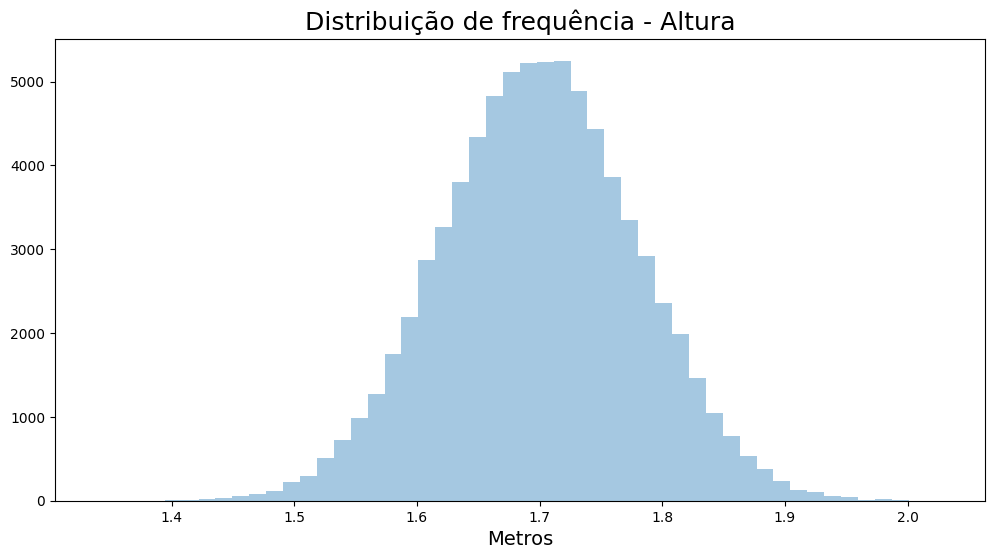

In [40]:
ax = sns.distplot(dados['Altura'], kde=False)
ax.figure.set_size_inches(12,6)
ax.set_title('Distribuição de frequência - Altura', fontsize=18)
ax.set_xlabel('Metros', fontsize=14)
ax

C:\Users\Gabriel\AppData\Local\Temp\ipykernel_13860\458022548.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(dados['Altura'])


<AxesSubplot: title={'center': 'Distribuição de frequência - Altura - KDE'}, xlabel='Metros', ylabel='Density'>

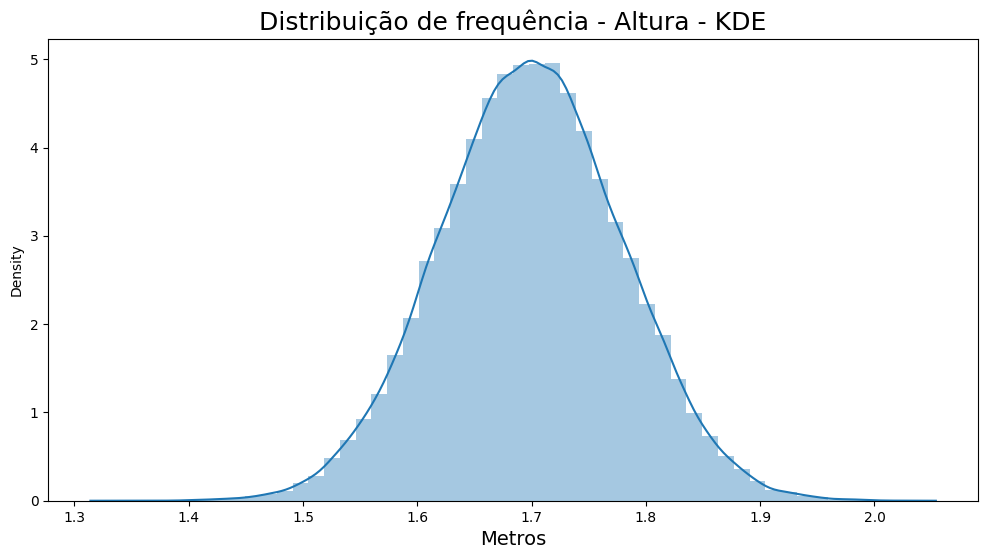

In [41]:
ax = sns.distplot(dados['Altura'])
ax.figure.set_size_inches(12,6)
ax.set_title('Distribuição de frequência - Altura - KDE', fontsize=18)
ax.set_xlabel('Metros', fontsize=14)
ax

<AxesSubplot: >

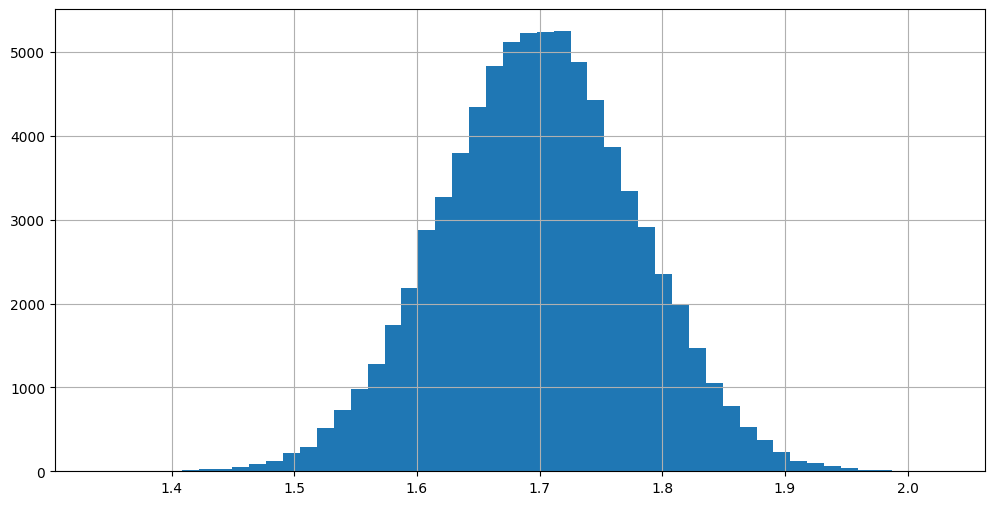

In [42]:
dados['Altura'].hist(bins=50, figsize=(12,6))

<AxesSubplot: >

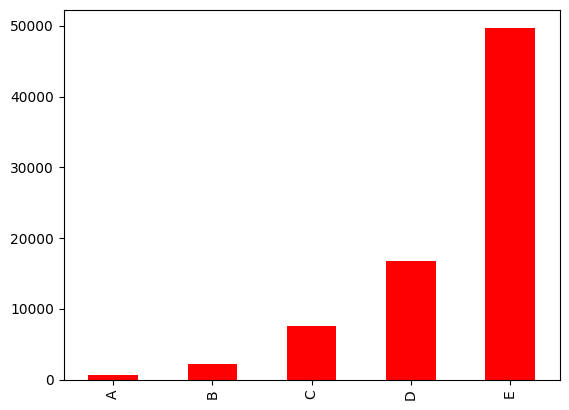

In [43]:
dist_freq_quantitativas['Frequência'].plot.bar(color='red')

## Medidas de tendência central

In [45]:
df = pd.DataFrame(data = {
    'Fulano': [8,10,4,8,6,10,8],
    'Beltrano': [10,2,0.5,1,3,9.5,10],
    'Sicrano': [7.5,8,7,8,8,8.5,7]
},
    index = ['Matemática',
    'Portugês',
    'Inglês',
    'Geografia',
    'História',
    'Física',
    'Química']
)

df.rename_axis('Matérias', axis= 'columns', inplace=True)

df

Matérias,Fulano,Beltrano,Sicrano
Matemática,8,10.0,7.5
Portugês,10,2.0,8.0
Inglês,4,0.5,7.0
Geografia,8,1.0,8.0
História,6,3.0,8.0
Física,10,9.5,8.5
Química,8,10.0,7.0


### Média aritmética

In [46]:
df['Fulano'].mean()

7.714285714285714

In [47]:
dados['Renda'].mean()

2000.3831988547631

In [48]:
dados.groupby(['Sexo'])['Renda'].mean()

Sexo
0    2192.441596
1    1566.847393
Name: Renda, dtype: float64

### Exercício

In [49]:
dataset = pd.DataFrame({
    'Sexo': ['H', 'M', 'M', 'M', 'M', 'H', 'H', 'H', 'M', 'M'],
    'Idade': [53, 72, 54, 27, 30, 40, 58, 32, 44, 51]
})

In [51]:
dataset['Idade'].mean()

46.1

In [52]:
dataset.groupby(['Sexo']).mean()

,Idade
Sexo,
H,45.750000
M,46.333333


### Mediana

In [54]:
df['Fulano'].median()

8.0

In [56]:
df['Beltrano'].median()

3.0

In [58]:
dados['Renda'].median()

1200.0

### Moda

In [59]:
df.mode()

Matérias,Fulano,Beltrano,Sicrano
0,8,10.0,8.0


In [60]:
dados['Renda'].mode()

0    788
Name: Renda, dtype: int64

In [61]:
dados['Altura'].mode()

0    1.568128
1    1.671225
2    1.681659
3    1.692977
4    1.708163
5    1.708370
6    1.753842
7    1.779073
8    1.796462
Name: Altura, dtype: float64

### Relação entre média, mediana e moda

C:\Users\Gabriel\AppData\Local\Temp\ipykernel_13860\1138672733.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(dados.query('Renda < 20000')['Renda'])


<AxesSubplot: xlabel='Renda', ylabel='Density'>

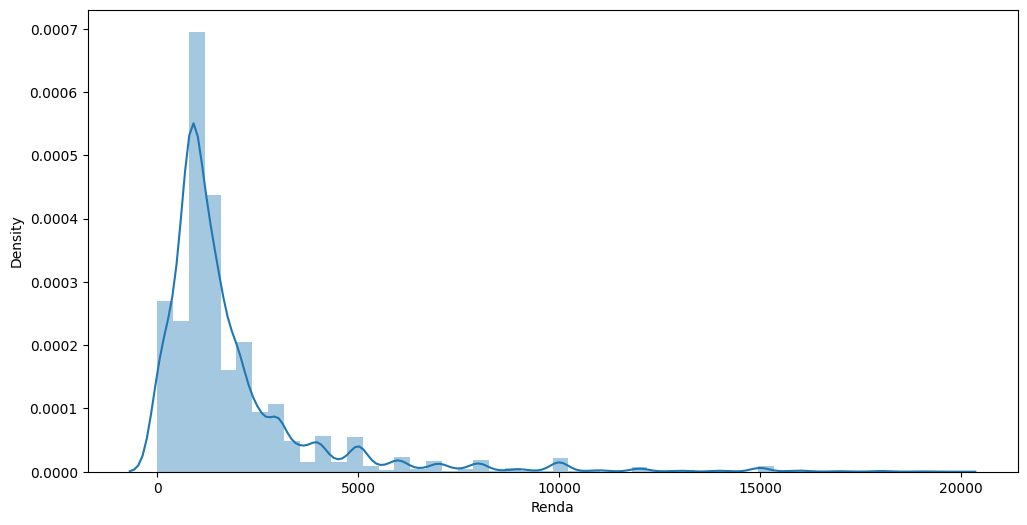

In [66]:
ax = sns.distplot(dados.query('Renda < 20000')['Renda'])
ax.figure.set_size_inches(12, 6)
ax

In [68]:
dados['Renda'].mean()


2000.3831988547631

In [69]:
dados['Renda'].median()


1200.0

In [70]:
dados['Renda'].mode()

0    788
Name: Renda, dtype: int64

C:\Users\Gabriel\AppData\Local\Temp\ipykernel_13860\2865256381.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(dados['Altura'])


<AxesSubplot: xlabel='Altura', ylabel='Density'>

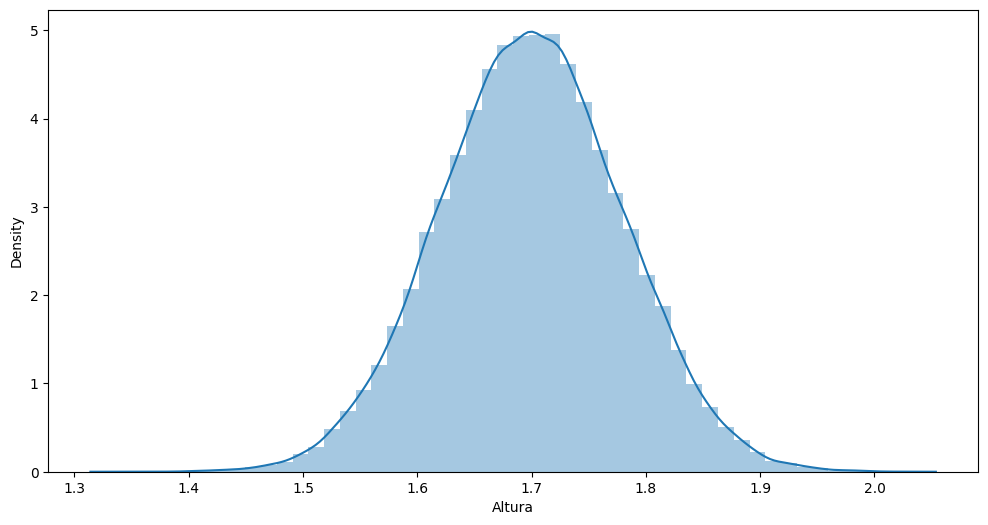

In [71]:
ax = sns.distplot(dados['Altura'])
ax.figure.set_size_inches(12, 6)
ax

In [72]:
dados['Altura'].mean()

1.6995124540575741

In [73]:
dados['Altura'].median()

1.6993247325

In [74]:
dados['Altura'].mode()

0    1.568128
1    1.671225
2    1.681659
3    1.692977
4    1.708163
5    1.708370
6    1.753842
7    1.779073
8    1.796462
Name: Altura, dtype: float64

C:\Users\Gabriel\AppData\Local\Temp\ipykernel_13860\2803966314.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(dados['Anos de Estudo'])


<AxesSubplot: xlabel='Anos de Estudo', ylabel='Density'>

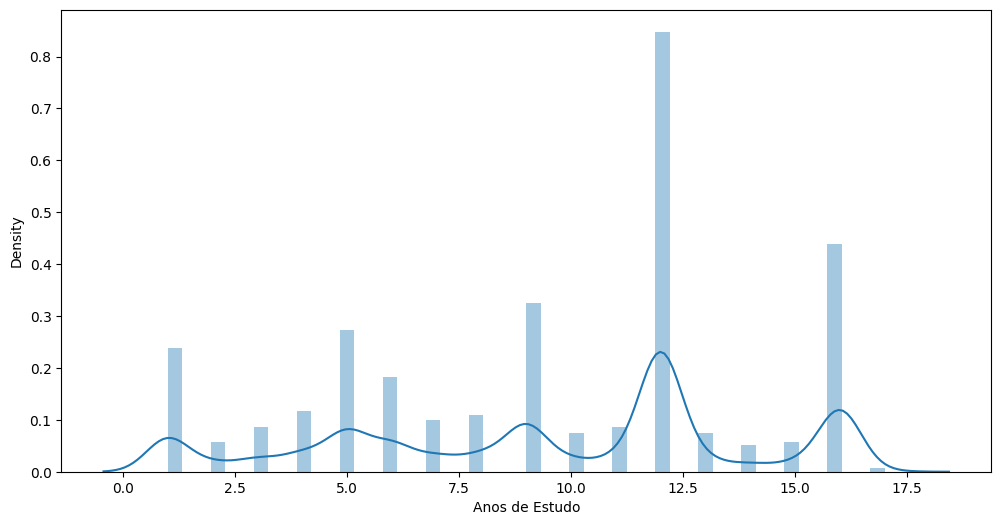

In [75]:
ax = sns.distplot(dados['Anos de Estudo'])
ax.figure.set_size_inches(12, 6)
ax

In [76]:
dados['Anos de Estudo'].mode()

0    12
Name: Anos de Estudo, dtype: int64

In [77]:
dados['Anos de Estudo'].mean()

9.469664237376367

In [78]:
dados['Anos de Estudo'].median()

11.0

## Medidas separatrizes

### Quartis, decis e percentis

In [80]:
# Buscando os quartis
dados['Renda'].quantile([0.25, 0.5, 0.75])

0.25     788.0
0.50    1200.0
0.75    2000.0
Name: Renda, dtype: float64

In [83]:
[(i/10)for i in range(1, 10)]

[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

In [84]:
# buscando os decis
dados['Renda'].quantile([(i/10)for i in range(1, 10)])

0.1     350.0
0.2     788.0
0.3     800.0
0.4    1000.0
0.5    1200.0
0.6    1500.0
0.7    1900.0
0.8    2500.0
0.9    4000.0
Name: Renda, dtype: float64

In [86]:
# buscando os percentis
dados['Renda'].quantile([(i/100)for i in range(1, 100)])

0.01        0.0
0.02        0.0
0.03        0.0
0.04       50.0
0.05      100.0
         ...   
0.95     6000.0
0.96     7000.0
0.97     8000.0
0.98    10000.0
0.99    15000.0
Name: Renda, Length: 99, dtype: float64

### BoxPlot

<AxesSubplot: title={'center': 'Altura'}, xlabel='Metros'>

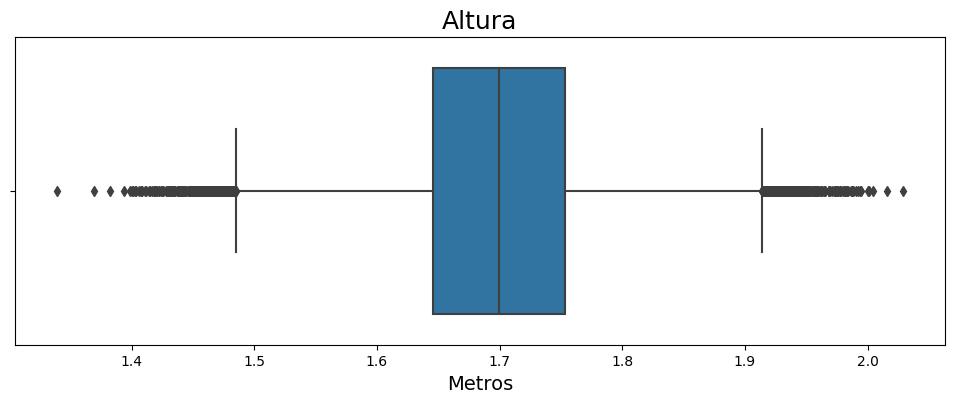

In [87]:
ax = sns.boxplot(x = 'Altura', data= dados, orient='h')
ax.figure.set_size_inches(12, 4)
ax.set_title('Altura', fontsize=18)
ax.set_xlabel('Metros', fontsize=14)
ax

<AxesSubplot: title={'center': 'Altura'}, xlabel='Metros', ylabel='Sexo'>

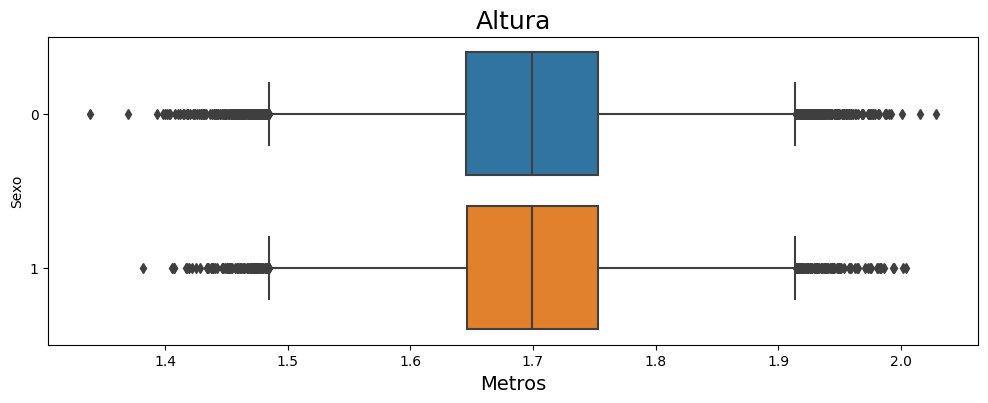

In [88]:
ax = sns.boxplot(x = 'Altura',y= 'Sexo', data= dados, orient='h')
ax.figure.set_size_inches(12, 4)
ax.set_title('Altura', fontsize=18)
ax.set_xlabel('Metros', fontsize=14)
ax

<AxesSubplot: title={'center': 'Renda'}, xlabel='R$', ylabel='Sexo'>

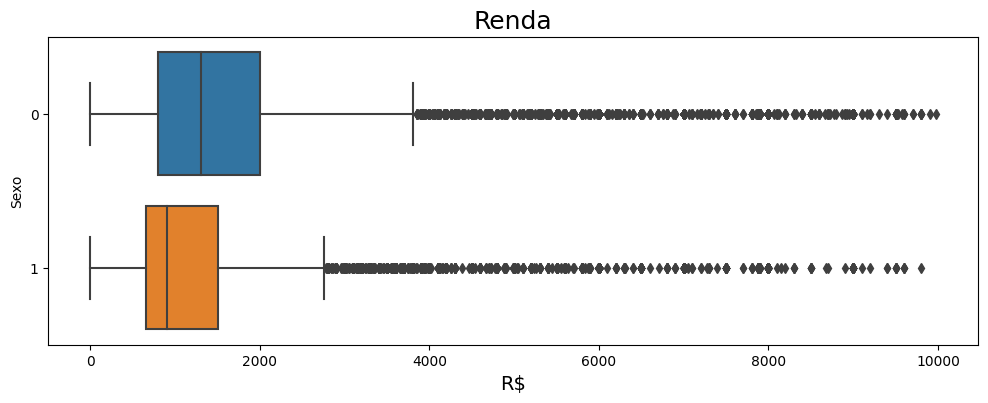

In [91]:
ax = sns.boxplot(x = 'Renda',y= 'Sexo', data= dados.query('Renda < 10000'), orient='h')
ax.figure.set_size_inches(12, 4)
ax.set_title('Renda', fontsize=18)
ax.set_xlabel('R$', fontsize=14)
ax

<AxesSubplot: title={'center': 'Anos de Estudos'}, xlabel='Anos', ylabel='Sexo'>

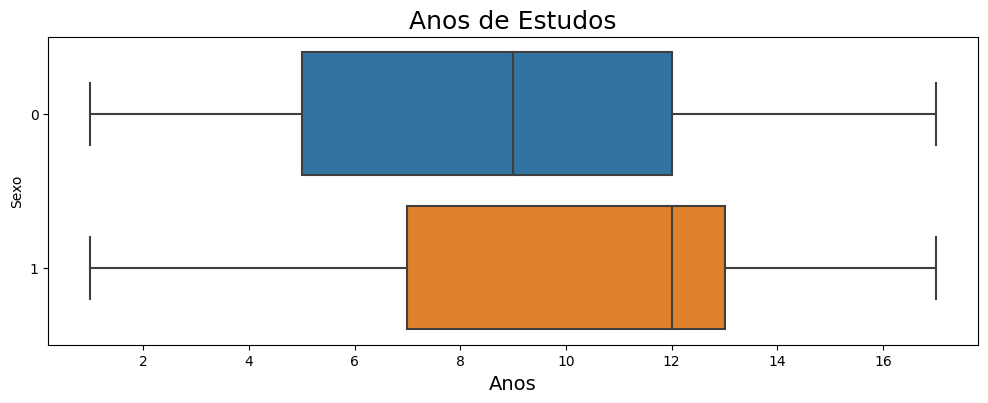

In [92]:
ax = sns.boxplot(x = 'Anos de Estudo',y= 'Sexo', data= dados, orient='h')
ax.figure.set_size_inches(12, 4)
ax.set_title('Anos de Estudos', fontsize=18)
ax.set_xlabel('Anos', fontsize=14)
ax

## Medidas de dispersão

### Desvio médio absoluto

In [96]:
notas_fulano.mad()

C:\Users\Gabriel\AppData\Local\Temp\ipykernel_13860\212375034.py:1: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.
  notas_fulano.mad()


1.5510204081632648

### Variância

In [100]:
notas_fulano.var()

4.57142857142857

### Desvio padrão

In [101]:
np.sqrt(notas_fulano.var())

2.1380899352993947

In [102]:
notas_fulano.std()

2.1380899352993947